In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


df_new = pd.read_csv("../src/cleaned_histoprice.csv")

In [25]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1254 entries, 0 to 1253
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   vnid     1254 non-null   int64 
 1   vintage  1254 non-null   int64 
 2   date     1254 non-null   object
 3   price    1254 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 39.3+ KB


In [26]:
df_new['date'] = pd.to_datetime(df_new['date'])

In [27]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1254 entries, 0 to 1253
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   vnid     1254 non-null   int64         
 1   vintage  1254 non-null   int64         
 2   date     1254 non-null   datetime64[ns]
 3   price    1254 non-null   int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 39.3 KB


# 📌 - List of vnid and vintage

In [28]:
vnid_list = df_new["vnid"].unique()

In [29]:
for vnid in vnid_list:
    vnid_data = df_new[df_new["vnid"] == vnid]
    vintage_list = vnid_data["vintage"].unique()
    
    vintage_list = sorted(vintage_list)
    
    print(f"vnid : {vnid}, vintage : {vintage_list}")

vnid : 1000001, vintage : [2013]
vnid : 1000232, vintage : [2007, 2008]
vnid : 1000245, vintage : [2005]
vnid : 1000287, vintage : [1990, 2007, 2008, 2009, 2010, 2011, 2012, 2013]
vnid : 1000359, vintage : [2016]
vnid : 1000391, vintage : [2010]
vnid : 1000535, vintage : [2004, 2007, 2018, 2019]
vnid : 1000548, vintage : [2011]
vnid : 1000564, vintage : [2007, 2008, 2009, 2010, 2011, 2012, 2014]
vnid : 1000577, vintage : [2007, 2008, 2009, 2010, 2011, 2012, 2013]
vnid : 1000580, vintage : [2007, 2009, 2011, 2013]
vnid : 1000593, vintage : [2010]


# Start analysis

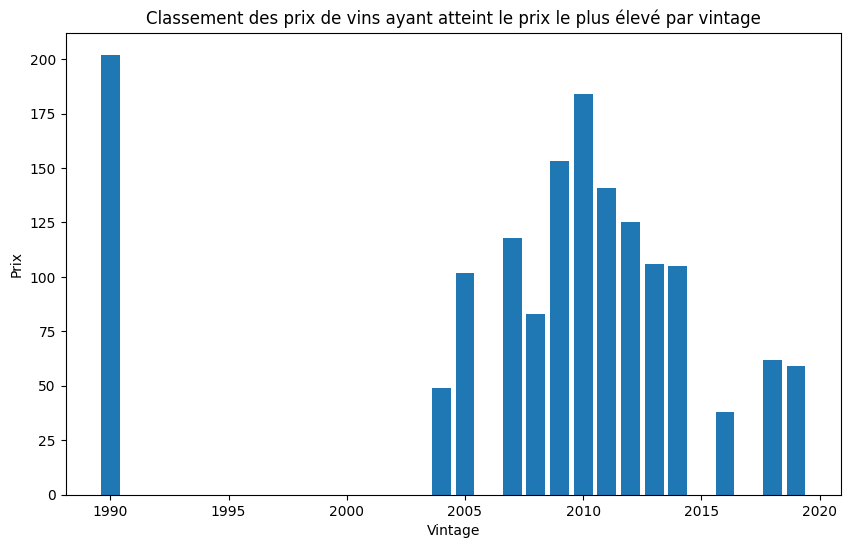

In [40]:
most_expensive_wine_by_vintage = df_new.groupby('vintage')['price'].idxmax()
most_expensive_wines = df_new.loc[most_expensive_wine_by_vintage]

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(most_expensive_wines['vintage'], most_expensive_wines['price'])
ax.set_xlabel('Vintage')
ax.set_ylabel('Prix')
ax.set_title('Classement des prix de vins ayant atteint le prix le plus élevé par vintage')
plt.show()


Here we see the most expensive vintages in the data set.
We can see that `1990` is the most expensive year (probably due to its age and the fact that it was the beginning of the last decade of the 20th century).
On the podium, we find `2010`, `2009` and `2011` in fourth place. 

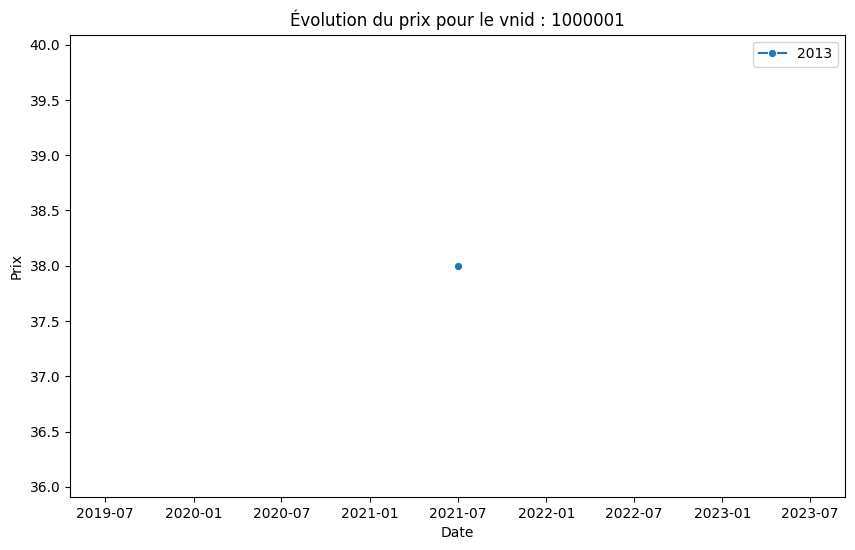

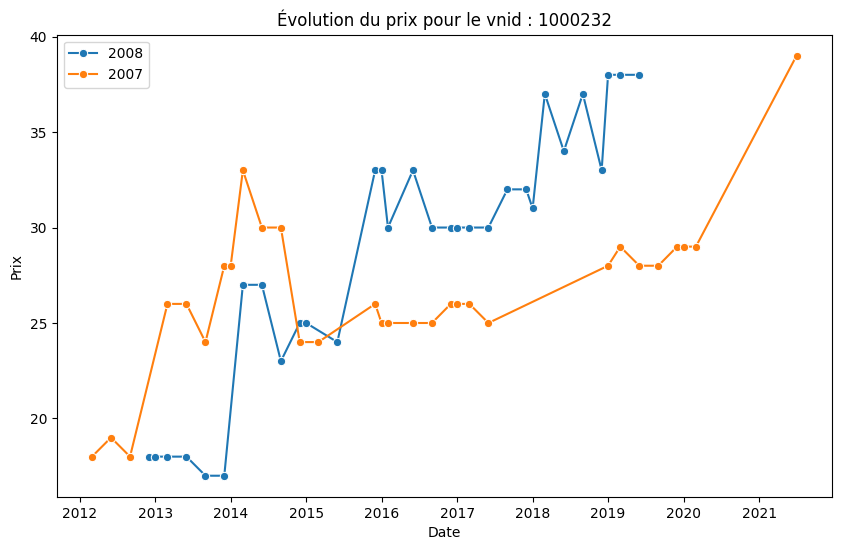

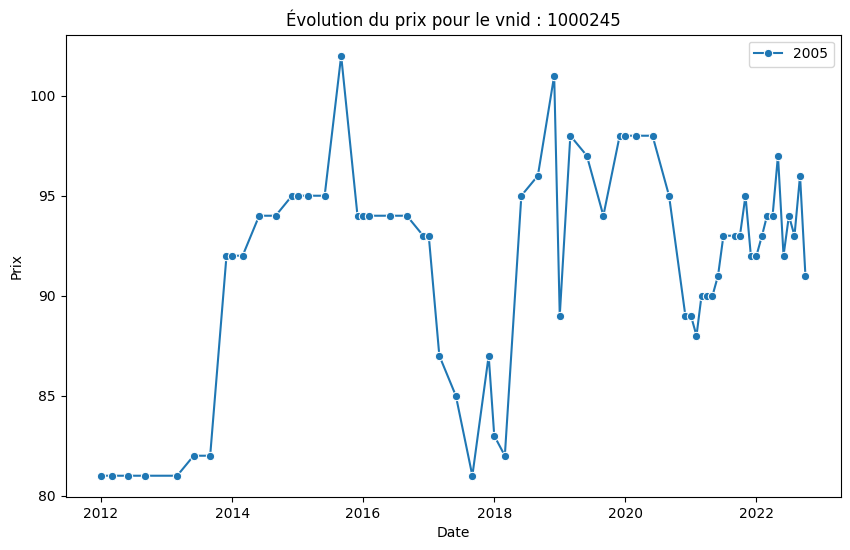

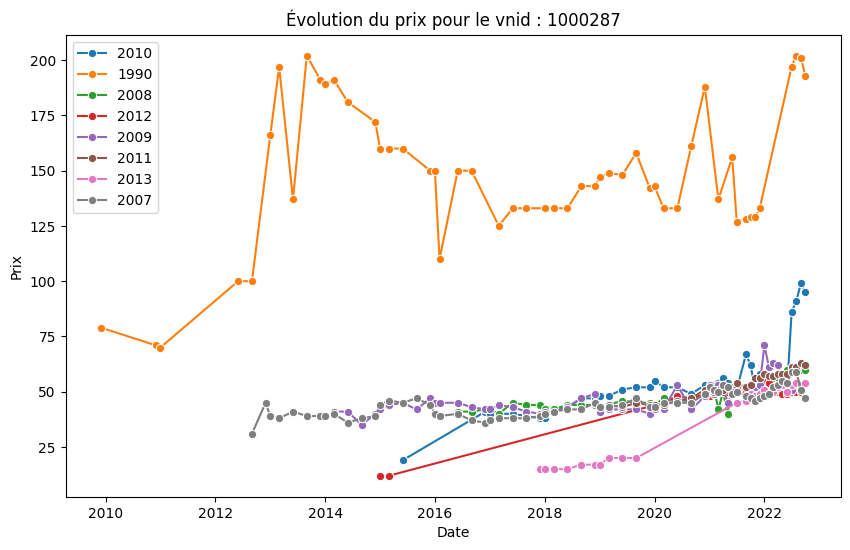

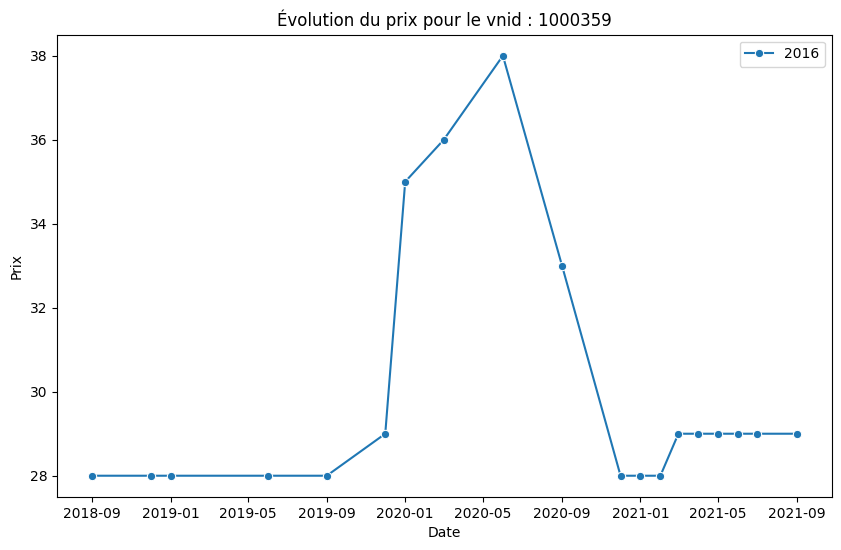

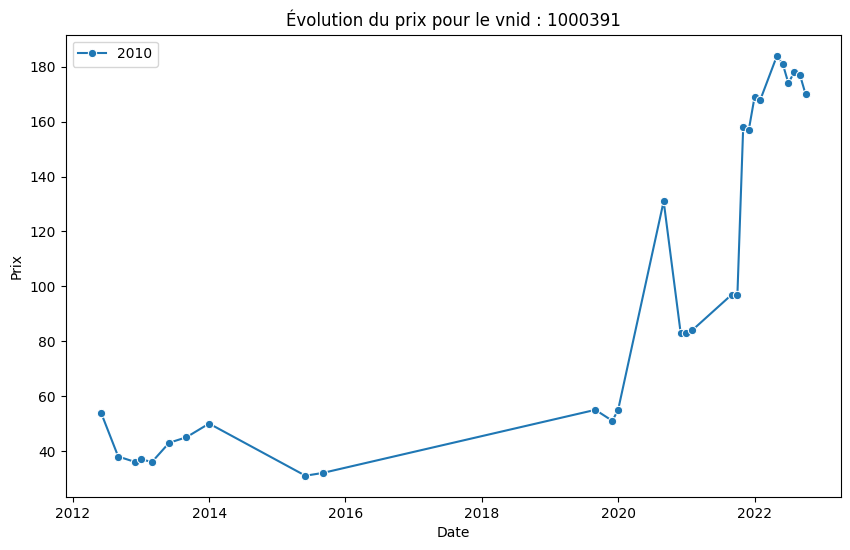

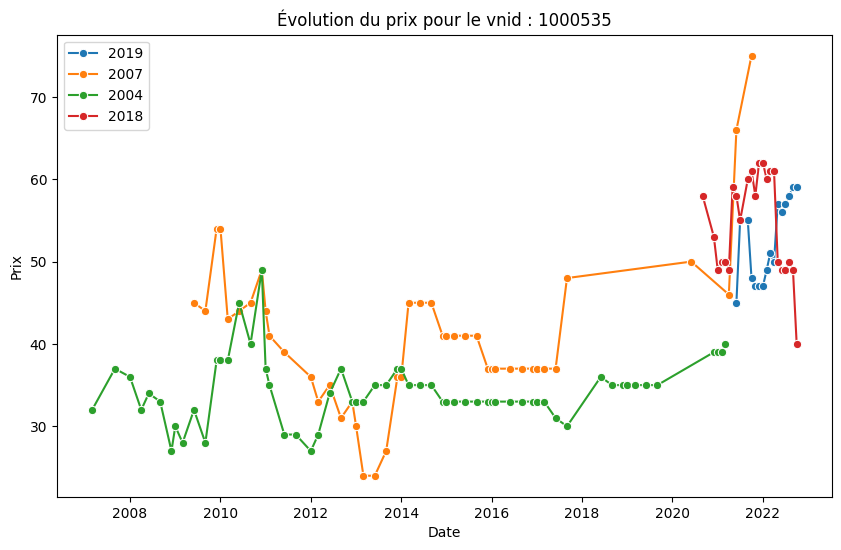

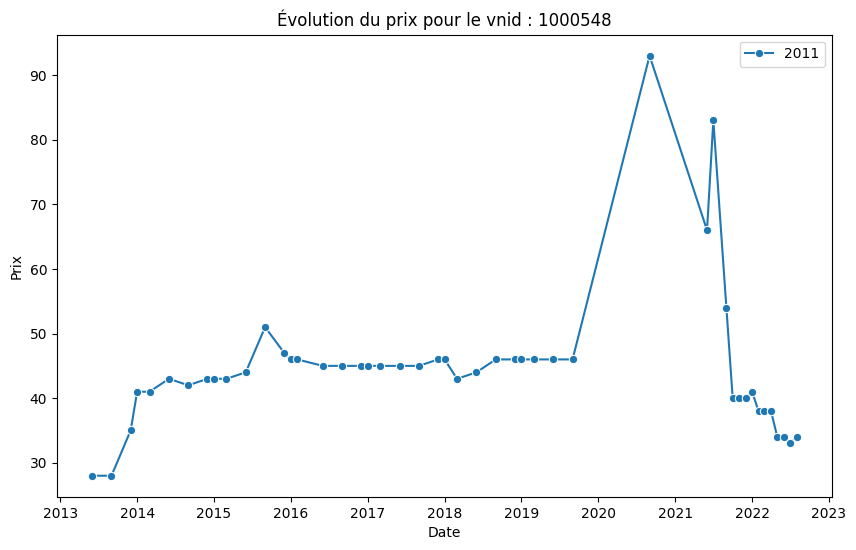

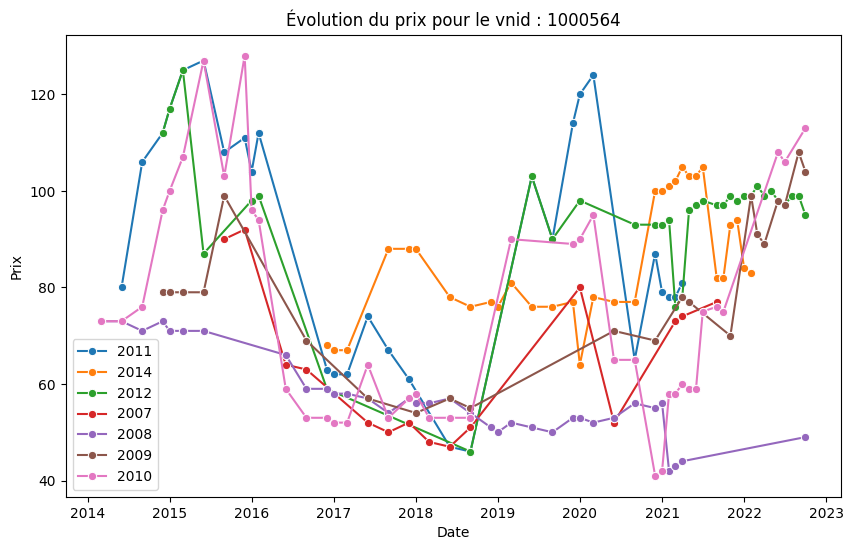

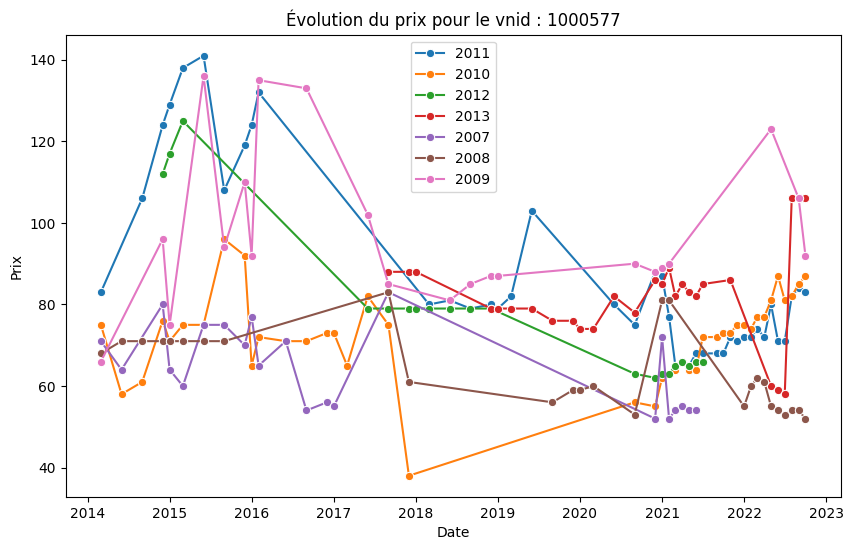

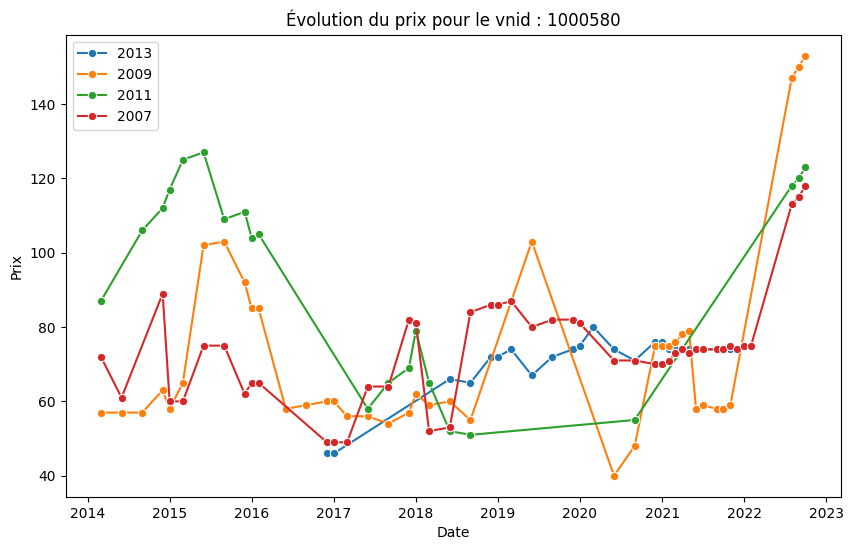

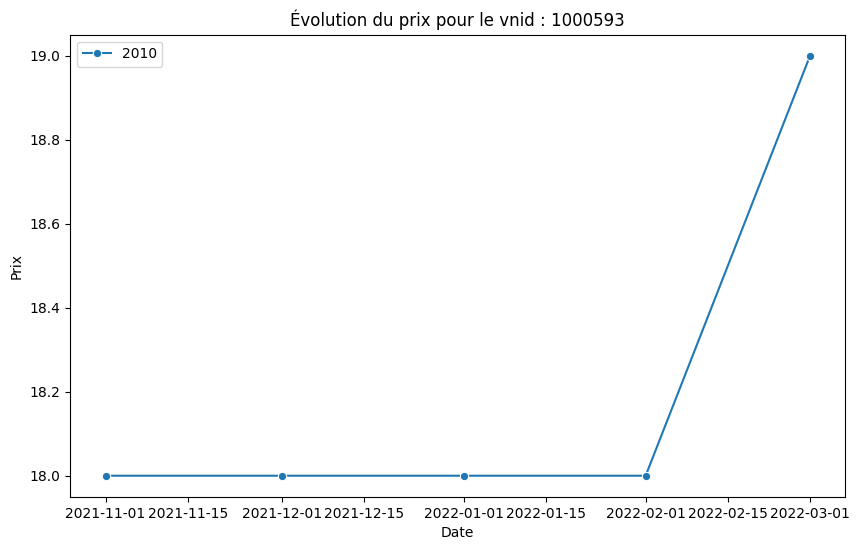

In [31]:
for vnid in vnid_list:
    vnid_data = df_new[df_new['vnid'] == vnid]
    vintage_list = vnid_data['vintage'].unique()

    fig, ax = plt.subplots(figsize=(10, 6))

    for vintage in vintage_list:
        vintage_data = vnid_data[vnid_data['vintage'] == vintage]
        sns.lineplot(x='date', y='price', data=vintage_data, marker='o', label=str(vintage))

    ax.set_xlabel('Date')
    ax.set_ylabel('Prix')
    ax.set_title('Évolution du prix pour le vnid : ' + str(vnid))
    ax.legend()

    plt.show()

I wanted to get a rough idea of price trends for the vintages of each wine to get an overall idea of the most expensive years. As you can see from the very first graph, the first 4 years have seen significant price movements. (`1990`, `2010`, `2009`, `2011`).

It should be noted that `2020` seems to show an increase in prices (although this is not the case for all wines, some have even fallen). This is reminiscent of the Covid-19 crisis, when a sudden change in organisation turned the whole process upside down. This is bound to lead to higher prices.

However, for the first 4 years, we can see a slight drop for 2022, but if we analyse all the prices carefully, we will certainly see an increase in prices in a few years' time.